In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math


In [2]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [3]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)
    
def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [4]:
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Makerere','SelectedFeatures')
#filepath= os.path.join(base_dir,'Makerere','all_features')
#filepath= os.path.join(base_dir,'Makerere','all_features' ,'100-lstm-units')
#sensor_type = 0

airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)','SelectedFeatures')
#filepath= os.path.join(base_dir,'Bugolobi(ambrosoli)','all_features')
filepath= os.path.join(base_dir,'Bugolobi(ambrosoli)','all_features','100-lstm-units')
sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulago','SelectedFeatures')
#filepath= os.path.join(base_dir,'Mulago','all_features')
#filepath= os.path.join(base_dir,'Mulago','all_features','100-lstm-units')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye','SelectedFeatures')
#filepath= os.path.join(base_dir,'Makindye','all_features')
#filepath= os.path.join(base_dir,'Makindye','all_features','100-lstm-units')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)', 'SelectedFeatures')
#filepath= os.path.join(base_dir,'Bukoto(kisu)','all_features')
#filepath= os.path.join(base_dir,'Bukoto(kisu)','all_features','100-lstm-units')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa','SelectedFeatures')
#filepath= os.path.join(base_dir,'Lubowa','all_features')
#filepath= os.path.join(base_dir,'Lubowa','all_features','100-lstm-units')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','SelectedFeatures')
#filepath= os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','all_features')
#filepath= os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','all_features','100-lstm-units')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Rubaga_Kabusu','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Rubaga_Kabusu','SelectedFeatures')
#filepath= os.path.join(base_dir,'Rubaga_Kabusu','all_features')
#filepath= os.path.join(base_dir,'Rubaga_Kabusu','all_features','100-lstm-units')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Kireka','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Kireka','SelectedFeatures')
#filepath= os.path.join(base_dir,'Kireka','all_features')
#filepath= os.path.join(base_dir,'Kireka','all_features','100-lstm-units')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Nsambya(American_Embassy)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Nsambya(American_Embassy)','SelectedFeatures')
#filepath= os.path.join(base_dir,'Nsambya(American_Embassy)','all_features')
#filepath= os.path.join(base_dir,'Nsambya(American_Embassy)','all_features','100-lstm-units')
#sensor_type = 2

airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,10.95,17.24,23.87,18,0.1942,0.3566,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,13.10,20.46,27.94,19,0.1942,0.3566,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,13.49,21.70,30.24,20,0.1942,0.3566,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,13.77,22.37,30.89,21,0.1942,0.3566,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,13.87,22.61,30.70,22,0.1942,0.3566,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,13.76,22.78,30.64,23,0.1942,0.3566,90,0.0,87.77,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,14.34,23.40,30.62,0,0.1942,0.3566,91,0.0,87.74,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,13.14,21.73,28.36,1,0.1942,0.3566,91,0.0,87.67,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,12.73,21.12,27.23,2,0.1942,0.3566,89,0.0,87.63,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,13.06,21.59,26.92,3,0.1942,0.3566,89,0.0,87.59,...,19.78,0.69,1,0,0,0,0,0,0,0


In [5]:
airquality_data_copy = airquality_data.copy()
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

### considering  all features

In [6]:
 airquality_data_for_selected_features = airquality_data

In [7]:
airquality_data_for_selected_features.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,10.95,17.24,23.87,18,0.1942,0.3566,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,13.10,20.46,27.94,19,0.1942,0.3566,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,13.49,21.70,30.24,20,0.1942,0.3566,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,13.77,22.37,30.89,21,0.1942,0.3566,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,13.87,22.61,30.70,22,0.1942,0.3566,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [8]:
airquality_data_for_selected_features.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-03-31 19:00:00,8.02,10.65,18.11,19,0.1848,0.2857,73,0.0,87.47,0.08,24.46,0.44,0,0,0,0,0,0,1,0
2019-03-31 20:00:00,10.18,13.66,23.95,20,0.1848,0.2857,80,0.0,87.53,0.00,23.84,0.51,0,0,0,0,0,0,0,1
2019-03-31 21:00:00,7.97,10.86,20.92,21,0.1848,0.2857,83,0.0,87.58,0.00,23.47,0.58,0,0,0,0,0,1,0,0
2019-03-31 22:00:00,5.63,7.63,13.92,22,0.1848,0.2857,83,0.0,87.62,0.00,23.10,0.49,0,0,0,0,1,0,0,0
2019-03-31 23:00:00,4.95,6.75,12.03,23,0.1848,0.2857,81,0.0,87.64,0.00,22.77,0.40,0,0,0,0,0,1,0,0


In [9]:
show_dataframe_info(airquality_data_for_selected_features)

(12485, 20)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'EVI', 'NDVI', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12485 entries, 2017-09-09 18:00:00 to 2019-03-31 23:00:00
Data columns (total 20 columns):
PM1(Ug/m3)            12485 non-null float64
PM2.5(Ug/m3)          12485 non-null float64
PM10(Ug/m3)           12485 non-null float64
hour                  12485 non-null int64
EVI                   12485 non-null float64
NDVI                  12485 non-null float64
humidity (%)          12485 non-null int64
precipitation (mm)    12485 non-null float64
pressure (kPa)        12485 non-null float64
radiation (W/m2)      12485 non-null float64
temperature (oC)      12485 non-null float64
windspeed (m/

In [10]:
airquality_data_for_selected_features.describe()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,10.844561,17.919439,24.540840,11.499960,0.170489,0.313348,-100.709251,0.128783,87.677032,157.677950,22.567326,-101.547885,0.103564,0.063356,0.074329,0.098438,0.214257,0.219143,0.123588,0.103324
std,19.423262,29.688500,33.048557,6.922913,0.033743,0.050660,1331.806401,1.207448,0.183153,233.664002,3.449116,1007.269962,0.304707,0.243612,0.262316,0.297918,0.410322,0.413682,0.329124,0.304394
min,0.000000,0.010000,0.010000,0.000000,0.113600,0.214300,-9998.000000,0.000000,87.060000,0.000000,15.470000,-9998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000,4.050000,7.510000,5.000000,0.151100,0.285700,66.000000,0.000000,87.550000,0.000000,19.870000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.340000,12.590000,18.650000,11.000000,0.164100,0.323300,82.000000,0.000000,87.670000,3.370000,21.580000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.100000,21.700000,30.030000,18.000000,0.196300,0.347900,91.000000,0.000000,87.810000,276.020000,25.140000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,435.470000,495.190000,558.530000,23.000000,0.249400,0.412600,100.000000,46.230000,88.200000,1057.280000,33.370000,36.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate Features From the Target

In [11]:
airquality_data_for_selected_features.columns

Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W'],
      dtype='object')

In [12]:
airquality_data_for_selected_features_copy = airquality_data_for_selected_features.copy()

In [13]:
airquality_data_for_selected_features = airquality_data_for_selected_features.values


### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [14]:
training_data_length = math.floor(len(airquality_data_for_selected_features)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data_for_selected_features)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data_for_selected_features)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

8739
1248
2497
12484


In [15]:
training_data = airquality_data_for_selected_features[0:training_data_length,:]
print(training_data.shape)

validation_data = airquality_data_for_selected_features[training_data_length:training_data_length+validation_data_length,:]
print(validation_data.shape)

testing_data = airquality_data_for_selected_features[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data.shape)



(8739, 20)
(1248, 20)
(2497, 20)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (e.g 3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

In [16]:
def generate_dataset_in_format_lstm_can_ingest(data, look_back=1):
    x_data, y_data = [], []
    for i in range(len(data)-look_back-1):
        feature_data = data[i:(i+look_back), 0]
        x_data.append(feature_data)
        y_data.append(data[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [17]:
## format series to supervised problem.. example obtained from machine learning mastery. Number of lag observations, number of observations as output
def generate_multivariate_dataset_in_format_lstm_can_ingest(data, number_of_inputs, number_of_outputs, dropnan=True):
    number_of_variables = 1 if type(data) is list else data.shape[1]
    data_frame= pd.DataFrame(data)
    columnsx, names = list(),list()
    #generate input sequence (t-n, ... t-1)
    for i in range(number_of_inputs, 0, -1):
        columnsx.append(data_frame.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(number_of_variables)]
       # forecast sequence (t, t+1, ... t+n)
    for i in range(0, number_of_outputs):
        columnsx.append(data_frame.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(number_of_variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(number_of_variables)]
            
    
    aggregated_df = pd.concat(columnsx, axis=1)
    aggregated_df.columns = names
    
    if dropnan:
        aggregated_df.dropna(inplace=True)
    return aggregated_df
    

### given data that goes back a number of timesteps e.g 3hrs, can we predict the next hour.

### training dataset

In [18]:
# reshape into X=t and Y=t+1 timesteps = lookback
timesteps = 1
number_of_features = 1
number_of_outputs = 1
transformed_training_data = generate_multivariate_dataset_in_format_lstm_can_ingest(training_data, timesteps, number_of_outputs)
# drop columns we don't want to predict...21 is pm2.5 we want to predict
if sensor_type == 0:
    transformed_training_data.drop(transformed_training_data.columns[[20,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37,38,39,]], axis=1, inplace=True)
    print(transformed_training_data.columns)
elif sensor_type == 1:
    transformed_training_data.drop(transformed_training_data.columns[[20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37]], axis=1, inplace=True)
    print(transformed_training_data.columns)
elif sensor_type == 2:
    transformed_training_data.drop(transformed_training_data.columns[[19,20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35]], axis=1, inplace=True)
    print(transformed_training_data.columns)


transformed_training_data_values = transformed_training_data.values
scaler = MinMaxScaler()
training_features =transformed_training_data_values[:, :-1]
scaled_training_features_original = scaler.fit_transform(training_features)
training_targets = transformed_training_data_values[:, -1]

scaled_training_features = np.reshape(scaled_training_features_original, 
                                      (scaled_training_features_original.shape[0], timesteps, scaled_training_features_original.shape[1]))
print(scaled_training_features.shape, training_targets.shape, scaled_training_features_original.shape )
transformed_training_data.head().T

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var19(t-1)', 'var20(t-1)',
       'var2(t)'],
      dtype='object')
(8738, 1, 20) (8738,) (8738, 20)


,1,2,3,4,5
var1(t-1),10.9500,13.1000,13.4900,13.7700,13.8700
var2(t-1),17.2400,20.4600,21.7000,22.3700,22.6100
var3(t-1),23.8700,27.9400,30.2400,30.8900,30.7000
var4(t-1),18.0000,19.0000,20.0000,21.0000,22.0000
var5(t-1),0.1942,0.1942,0.1942,0.1942,0.1942
var6(t-1),0.3566,0.3566,0.3566,0.3566,0.3566
var7(t-1),73.0000,77.0000,80.0000,82.0000,87.0000
var8(t-1),0.0000,0.0000,0.0000,0.0000,0.0000
var9(t-1),87.5000,87.5800,87.6700,87.6600,87.6800
var10(t-1),0.9000,0.0000,0.0000,0.0000,0.0000


### validation dataset

In [19]:
transformed_validation_data = generate_multivariate_dataset_in_format_lstm_can_ingest(validation_data, timesteps, number_of_outputs)

if sensor_type == 0:
    transformed_validation_data.drop(transformed_validation_data.columns[[20,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37,38,39,]], axis=1, inplace=True)
    print(transformed_validation_data.columns)
elif sensor_type == 1:
    transformed_validation_data.drop(transformed_validation_data.columns[[20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37]], axis=1, inplace=True)
    print(transformed_validation_data.columns)
elif sensor_type == 2:
    transformed_validation_data.drop(transformed_validation_data.columns[[19,20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35]], axis=1, inplace=True)
    print(transformed_validation_data.columns)

##convert dataframe to array form
transformed_validation_data_values = transformed_validation_data.values
validation_features = transformed_validation_data_values[:, :-1]
validation_targets =  transformed_validation_data_values[:, -1]
scaled_validation_features_original = scaler.fit_transform(validation_features)
# reshape validation features to [samples, time steps, features]
scaled_validation_features = np.reshape(scaled_validation_features_original, 
                                      (scaled_validation_features_original.shape[0], timesteps, scaled_validation_features_original.shape[1]))

print(scaled_validation_features.shape, validation_targets.shape, scaled_validation_features_original.shape )
transformed_validation_data.head().T


Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var19(t-1)', 'var20(t-1)',
       'var2(t)'],
      dtype='object')
(1247, 1, 20) (1247,) (1247, 20)


,1,2,3,4,5
var1(t-1),13.8700,13.7600,14.3400,13.1400,12.7300
var2(t-1),22.6100,22.7800,23.4000,21.7300,21.1200
var3(t-1),30.7000,30.6400,30.6200,28.3600,27.2300
var4(t-1),22.0000,23.0000,0.0000,1.0000,2.0000
var5(t-1),0.1300,0.1300,0.1300,0.1300,0.1300
var6(t-1),0.2341,0.2341,0.2341,0.2341,0.2341
var7(t-1),88.0000,89.0000,87.0000,96.0000,98.0000
var8(t-1),0.0000,0.0000,0.7000,7.0600,5.0700
var9(t-1),87.8300,87.8300,87.8500,87.8700,87.7800
var10(t-1),0.0000,0.0000,0.0000,0.0000,0.0000


### Testing dataset

In [20]:
transformed_testing_data = generate_multivariate_dataset_in_format_lstm_can_ingest(testing_data,
                                                                                   timesteps, number_of_outputs)

if sensor_type == 0:
    transformed_testing_data.drop(transformed_testing_data.columns[[20,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37,38,39,]], axis=1, inplace=True)
elif sensor_type == 1:
    transformed_testing_data.drop(transformed_testing_data.columns[[20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35, 36,37]], axis=1, inplace=True)
elif sensor_type == 2:
    transformed_testing_data.drop(transformed_testing_data.columns[[19,20,21,22,23, 24,25, 26,27, 28,29, 30,31,32,33, 34,35]], axis=1, inplace=True)

print(transformed_testing_data.columns)

transformed_testing_data_values = transformed_testing_data.values
testing_features =  transformed_testing_data_values[:, :-1]
testing_targets =  transformed_testing_data_values[:, -1]

test_scaler = MinMaxScaler()
scaled_testing_features_original = test_scaler.fit_transform(testing_features)
# reshape testing features to [samples, timesteps, features]
scaled_testing_features = np.reshape(scaled_testing_features_original, 
                                      (scaled_testing_features_original.shape[0], timesteps, scaled_testing_features_original.shape[1]))

print(scaled_testing_features.shape, testing_targets.shape, scaled_testing_features_original.shape )
transformed_testing_data.head().T

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var19(t-1)', 'var20(t-1)',
       'var2(t)'],
      dtype='object')
(2496, 1, 20) (2496,) (2496, 20)


,1,2,3,4,5
var1(t-1),13.8700,13.7600,14.3400,13.1400,12.7300
var2(t-1),22.6100,22.7800,23.4000,21.7300,21.1200
var3(t-1),30.7000,30.6400,30.6200,28.3600,27.2300
var4(t-1),22.0000,23.0000,0.0000,1.0000,2.0000
var5(t-1),0.1840,0.1840,0.1840,0.1840,0.1840
var6(t-1),0.3233,0.3233,0.3233,0.3233,0.3233
var7(t-1),91.0000,92.0000,93.0000,93.0000,95.0000
var8(t-1),0.0000,0.0000,0.0000,0.0200,0.0300
var9(t-1),87.7300,87.7200,87.7200,87.7200,87.7000
var10(t-1),0.0000,0.0000,0.0000,0.0000,0.0000


### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [21]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features_original,training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features_original)
print(svr_predictions.shape)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(2496,)
[102.66667198 102.55801983 105.17962358 ...  59.63966301  73.75898102
  58.97773198]


In [22]:
svr_predictions = svr_predictions.reshape(-1, 1)
svr_predictions.shape

(2496, 1)

In [23]:
scaled_testing_features_original.shape

(2496, 20)

### inverting the predictions and actual values from standardized form

In [24]:
svr_predictions.ravel()

array([102.66667198, 102.55801983, 105.17962358, ...,  59.63966301,
        73.75898102,  58.97773198])

In [25]:
#svr_testing_predictions_unscaled = scaler.inverse_transform(svr_predictions)
svr_mae = mean_absolute_error(testing_targets, svr_predictions)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets, svr_predictions)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':svr_predictions.ravel()}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  57.87
SVR RMSE:  71.7


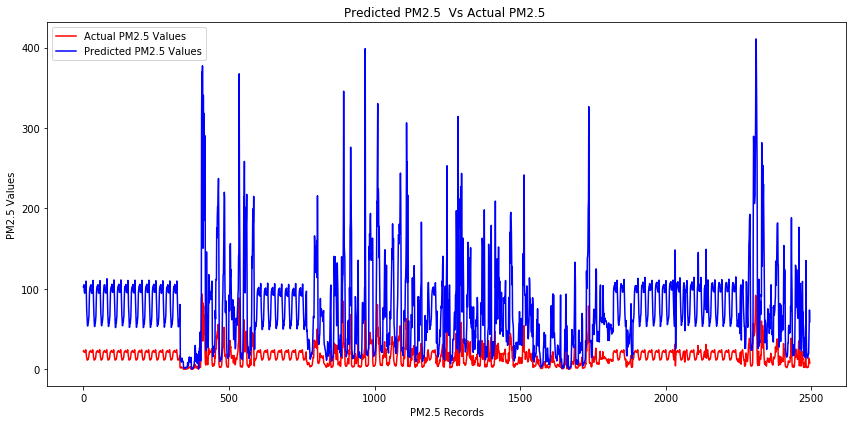

In [26]:
fig_svr_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_svr_predictions_vs_actual = fig_svr_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(svr_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5  Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()
plt.tight_layout()
fig_svr_predictions_vs_actual.savefig(os.path.join(filepath, 'svr_model_prediction_vs_actual.png'))

### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [27]:
scaled_training_features.shape[1], scaled_training_features.shape[2]

(1, 20)

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.models import load_model

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

model = Sequential()
model.add(LSTM(100, input_shape = (scaled_training_features.shape[1], scaled_training_features.shape[2]))) #timesteps, seq_length(no of features)
model.add(Dense(1))

callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=10, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'basic_lstm_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error', rmse])
basic_model_history = model.fit(scaled_training_features, training_targets, epochs=50,
                                validation_data=(scaled_validation_features, validation_targets),
                               callbacks=callbacks_list)

Train on 8738 samples, validate on 1247 samples
Epoch 1/50
8738/8738 [==============================] - 5s 518us/step - loss: 1351.4629 - mean_absolute_error: 16.4738 - rmse: 30.8796 - val_loss: 177.0523 - val_mean_absolute_error: 11.1064 - val_rmse: 12.6822
Epoch 2/50
8738/8738 [==============================] - 1s 131us/step - loss: 1166.1915 - mean_absolute_error: 15.8456 - rmse: 28.4457 - val_loss: 184.2330 - val_mean_absolute_error: 11.6041 - val_rmse: 12.9925
Epoch 3/50
8738/8738 [==============================] - 1s 123us/step - loss: 1085.6334 - mean_absolute_error: 14.5368 - rmse: 27.2279 - val_loss: 170.4008 - val_mean_absolute_error: 11.6368 - val_rmse: 12.6862
Epoch 4/50
8738/8738 [==============================] - 1s 142us/step - loss: 955.0975 - mean_absolute_error: 12.6194 - rmse: 24.8993 - val_loss: 244.0114 - val_mean_absolute_error: 14.4599 - val_rmse: 15.5384
Epoch 5/50
8738/8738 [==============================] - 1s 128us/step - loss: 823.7255 - mean_absolute_error:

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               48400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 48,501
Trainable params: 48,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
basic_model_architecture_path = os.path.join(filepath, 'basic_model_plot.png')
plot_model(model, to_file=basic_model_architecture_path, show_shapes=False, show_layer_names=False)

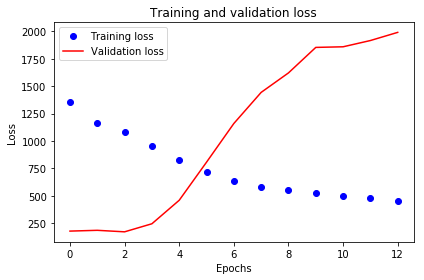

In [31]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))
#figsize=(12,6)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [32]:
print(np.argmin(val_loss))
#val_loss[70]

2


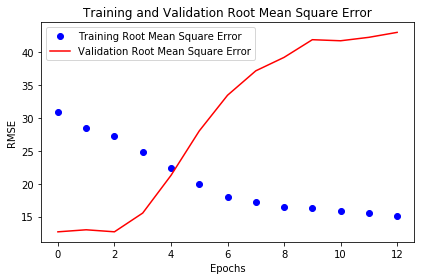

In [33]:
hist_rmse = basic_model_history.history['rmse']
val_rmse = basic_model_history.history['val_rmse']
epochs = range(len(hist_rmse))
fig_rmse = plt.figure()
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Square Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Square Error')
plt.title('Training and Validation Root Mean Square Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

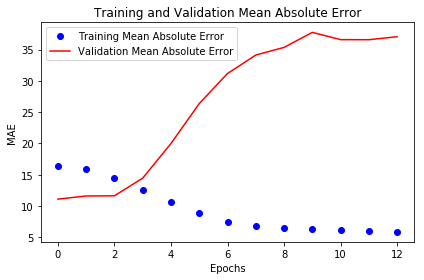

In [34]:
mae = basic_model_history.history['mean_absolute_error']
val_mae = basic_model_history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure()
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.tight_layout()
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [35]:
saved_model = load_model(os.path.join(filepath,'basic_lstm_model.h5'),  custom_objects={'rmse': rmse})

basic_lstm_model_train_evaluation = saved_model.evaluate(scaled_training_features, training_targets, verbose=0)
basic_lstm_model_test_evaluation = saved_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(basic_lstm_model_train_evaluation)
print(basic_lstm_model_test_evaluation)

[1020.9616644360103, 13.503385707316504, 16.341064459564322]
[122.3722324126806, 9.340374463643784, 10.467029180282202]


In [36]:
basic_lstm_model_predictions = saved_model.predict(scaled_testing_features)
basic_lstm_model_evaluation =  saved_model.evaluate(scaled_testing_features, testing_targets)
print(basic_lstm_model_evaluation)
print(saved_model.metrics_names)

2496/2496 [==============================] - 0s 28us/step
[122.3722324126806, 9.340374463643784, 10.467029180282202]
['loss', 'mean_absolute_error', 'rmse']


In [37]:
### converting targets and predictions to from scaled values

In [38]:
basic_lstm_rmse = calculate_rmse(testing_targets, basic_lstm_model_predictions)
basic_lstm_mae =  mean_absolute_error(testing_targets, basic_lstm_model_predictions)
print('BASIC LSTM RMSE: ', basic_lstm_rmse.round(2))
print('BASIC LSTM MAE: ', basic_lstm_mae.round(2))

BASIC LSTM RMSE:  11.06
BASIC LSTM MAE:  9.34


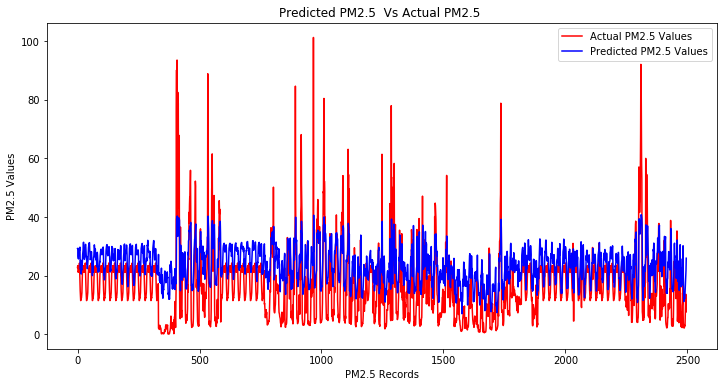

In [39]:
fig_basic_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_basic_lstm_predictions_vs_actual = fig_basic_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(basic_lstm_model_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5  Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_basic_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'basic_lstm_model_prediction_vs_actual.png'))

In [40]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(2496, 1)
(2496,)


In [41]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':basic_lstm_model_predictions.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Creation of Neural Network Architecture,Training & Evaluation  on Stacked LSTM and DROPOUT layers

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

deep_lstm_callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=10, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'deep_lstm_best_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

regressor_model = Sequential()
regressor_model.add(LSTM(units=100, return_sequences = True, input_shape = (scaled_training_features.shape[1],scaled_training_features.shape[2])))
regressor_model.add(Dropout(0.2))
number_of_features
regressor_model.add(LSTM(units = 100, return_sequences = True))
regressor_model.add(Dropout(0.1))
regressor_model.add(LSTM(units = 100))
#regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mse',metrics = ['mean_absolute_error',rmse] )

##Training the model
history = regressor_model.fit(scaled_training_features, training_targets,epochs = 100,
                              validation_data=(scaled_validation_features, validation_targets), batch_size=32,
                              callbacks=deep_lstm_callbacks_list)


Train on 8738 samples, validate on 1247 samples
Epoch 1/100
8738/8738 [==============================] - 9s 1ms/step - loss: 1260.2883 - mean_absolute_error: 16.1546 - rmse: 29.8647 - val_loss: 168.6827 - val_mean_absolute_error: 10.7429 - val_rmse: 12.2843
Epoch 2/100
8738/8738 [==============================] - 4s 408us/step - loss: 1195.5806 - mean_absolute_error: 16.0421 - rmse: 28.8020 - val_loss: 179.4860 - val_mean_absolute_error: 11.1683 - val_rmse: 12.7209
Epoch 3/100
8738/8738 [==============================] - 3s 370us/step - loss: 1148.6193 - mean_absolute_error: 14.6597 - rmse: 27.7691 - val_loss: 185.4027 - val_mean_absolute_error: 12.0162 - val_rmse: 13.3249
Epoch 4/100
8738/8738 [==============================] - 3s 376us/step - loss: 923.3999 - mean_absolute_error: 9.0640 - rmse: 22.6985 - val_loss: 560.8169 - val_mean_absolute_error: 22.0963 - val_rmse: 23.5852
Epoch 5/100
8738/8738 [==============================] - 3s 355us/step - loss: 813.5438 - mean_absolute_erro

In [43]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')
regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()
regressor_model_architecture_path = os.path.join(filepath, 'deep_lstm_model_plot.png')
plot_model(regressor_model, to_file=regressor_model_architecture_path, show_shapes=False, show_layer_names=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            48400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 209,301
Trainable params: 209,301
Non-trainable params: 0
_________________________________________________________________


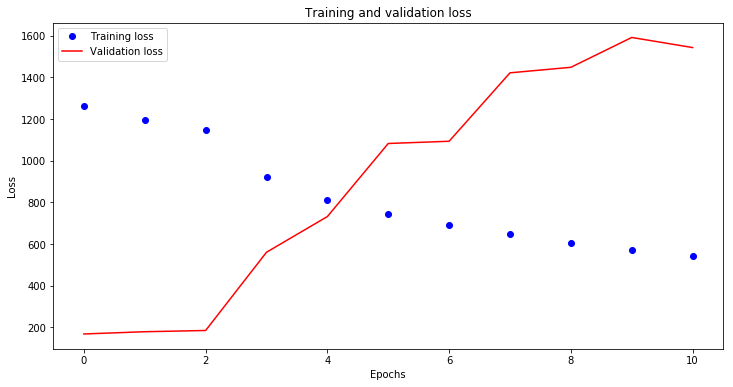

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig_deep_lstm_loss= plt.figure(figsize=(12,6))
ax = fig_deep_lstm_loss.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig_deep_lstm_loss.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_loss.png'))

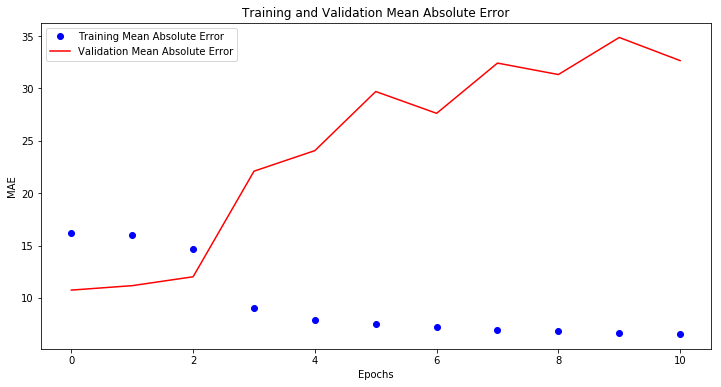

In [45]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_deep_lstm_mae = plt.figure(figsize=(12,6))
ax_mae = fig_deep_lstm_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

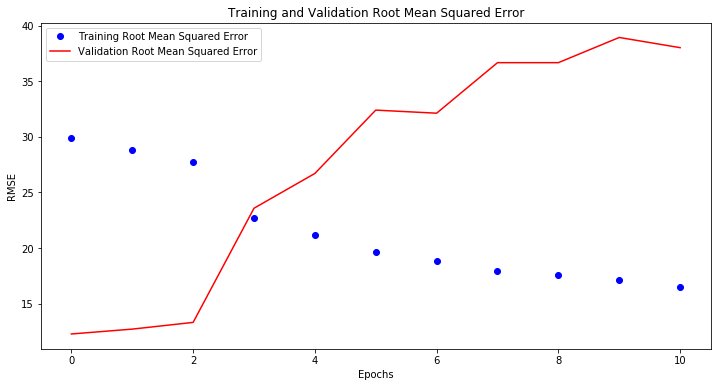

In [46]:
hist_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Squared Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Squared Error')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'deep_model_history_training_validation_RMSE.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [54]:
saved_best_deep_lstm_model = load_model(os.path.join(filepath,'deep_lstm_best_model.h5'),  custom_objects={'rmse': rmse})
#saved_best_deep_lstm_model = load_model(os.path.join(filepath,'airquality_prediction_model.h5'),  custom_objects={'rmse': rmse})
deep_lstm_model_train_evaluation = saved_best_deep_lstm_model.evaluate(scaled_training_features, training_targets, verbose=0)
deep_lstm_model_test_evaluation = saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(deep_lstm_model_train_evaluation)
print(deep_lstm_model_test_evaluation)

[1195.4193999643428, 15.970988578778924, 18.878771010403447]
[143.87039791009366, 8.916908893829737, 10.404545484445034]


In [55]:
deep_lstm_model_predictions = saved_best_deep_lstm_model.predict(scaled_testing_features)
deep_lstm_model_evaluation =  saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets)

deep_lstm_rmse = calculate_rmse(testing_targets, deep_lstm_model_predictions )
deep_lstm_mae =  mean_absolute_error(testing_targets, deep_lstm_model_predictions)
print('Deep LSTM RMSE: ', deep_lstm_rmse.round(2))
print('Deep LSTM MAE: ', deep_lstm_mae.round(2))

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5':testing_targets.ravel(), 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

2496/2496 [==============================] - 0s 108us/step
Deep LSTM RMSE:  11.99
Deep LSTM MAE:  8.92


### Verification of the average in the results of the forecasts and in the actual results

In [56]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', testing_targets.mean())

predictions 18.90527
actual pm2.5 values 16.21225560897436


### Visualization of the predictions and actual values of PM2.5
1. #### using line graph

In [50]:
deep_lstm_model_predictions.shape

(2496, 1)

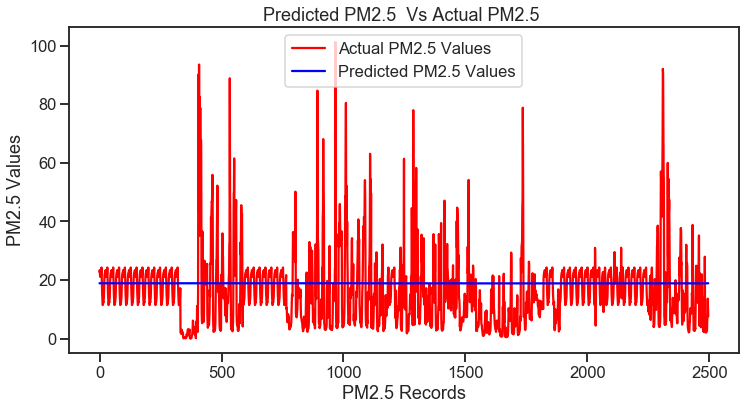

In [57]:
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5  Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))

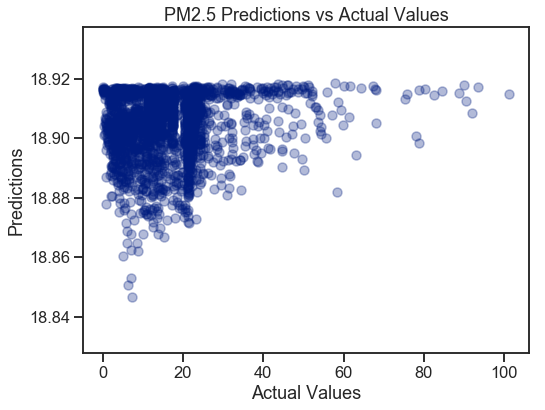

In [58]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
fig_deep_lstm_predictions_vs_actual_scatter = plt.figure(figsize=(8,6))
ax_fig_deep_lstm_predictions_vs_actual_scatter = fig_deep_lstm_predictions_vs_actual_scatter.add_subplot(111)
ax = ax_fig_deep_lstm_predictions_vs_actual_scatter
# we are going to use y_test, y_test_pred
ax.scatter(testing_targets, deep_lstm_model_predictions, alpha=.3)

ax.set(xlabel='Actual Values', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Actual Values');

fig_deep_lstm_predictions_vs_actual_scatter.savefig(os.path.join(filepath, 'deep_lstm_model_predictions_vs_actual_values_scatter.png'))

### saving results to file

In [53]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM RMSE: {} \n Basic LSTM MAE: {} \n Basic LSTM Evaluation Results: {} \n Deep LSTM RMSE : {} \n Deep LSTM MAE: {} \n Deep LSTM Evaluation Results: {}, \n metrics {}"
              .format(svr_rmse.round(2),svr_mae.round(2),  basic_lstm_rmse.round(2), basic_lstm_mae.round(2), basic_lstm_model_evaluation,
                      deep_lstm_rmse.round(2), deep_lstm_mae.round(2),  deep_lstm_model_evaluation, model.metrics_names ), file=text_file)